### Unsupervised Searches For Parity Violation

This Notebook, acts as to demonstrate the the code base used for our paper to detect parity violation
The Notebook is split into the following sections:
- Data loading
- Creating Images
- Unsupervised model

##### Data Loading
We begin by loading the boss data, and then we generate some random data that we know to be parity violating.

In [4]:
from ml_pv.datagen.load_boss import prepare_boss_data

# Load the BOSS data for the CMASS North sample
boss_coords, boss_z, boss_w = prepare_boss_data(
        fits_file='data/galaxy_DR12v5_CMASS_North.fits',
        sample_size=700000,
        random_seed=42,
        z_min=0.43,
        z_max=0.7,
    )

Sample size 618806 exceeds total entries 618806. Using all entries.


In [5]:
print(f"Coordinates shape: {boss_coords.shape}")

Coordinates shape: (568776,)


##### Creating Images

Now that we have loaded the galaxy data, we need to construct the images to use for the CNN

In [10]:
from ml_pv.datagen.image_gen.sampler import random_sampling_images
from ml_pv.datagen.image_gen.rendering import display_sample_dist

out_dir_boss = 'all_images/ipynb_demo_boss'


def run_image_generation(
    coords=boss_coords,
    z=boss_z,
    w=boss_w,
    out_dir=out_dir_boss,
    num_train_samples = 96,
    num_test_samples = 24,
    square_size=0.5,
    img_size=64,
    bw_mode=False, 
    prefix='boss',
):
    """
    Generate images from the BOSS data using random sampling.
    
    :param coords: Coordinates of galaxies.
    :param z: Redshift values.
    :param w: Weights for the galaxies.
    :param cfg: Configuration object containing image generation parameters.
    :param out_dir: Output directory for the generated images.
    """
    # Create output directories if they do not exist
    testing, _, avg_n_test = random_sampling_images(
        ra=coords.ra.deg,
        dec=coords.dec.deg,
        redshift=z,
        weights=w,
        num_samples=num_test_samples,
        square_size=square_size,
        img_size=img_size,
        bw_mode=bw_mode,
        output_dir=f"{out_dir}/test/test",
        prefix=f"{prefix}_test_",
    )

    print(
        f"Finished: generated {num_test_samples} testing images in {out_dir},\n avg {avg_n_test} points/image"
    )

    training, _, avg_n_train = random_sampling_images(
        ra=coords.ra.deg,
        dec=coords.dec.deg,
        redshift=z,
        weights=w,
        num_samples=num_train_samples,
        square_size=square_size,
        img_size=img_size,
        bw_mode=bw_mode,
        output_dir=f"{out_dir}/train/train",
        prefix=f"{prefix}_train_",
        preexisting_squares=testing, # Stop training samples from overlapping with testing samples
    )
    print(
        f"Finished: generated {num_train_samples} training images in {out_dir},\n avg {avg_n_train} points/image"
    )

    viz_out = f'plots/sample_dist_{prefix}_ipynb.png'
    display_sample_dist(
        ra=coords.ra.deg,
        dec=coords.dec.deg,
        train_squares=training,
        test_squares=testing,
        output_path=viz_out,
    )
    print(f"Saved sample‐distribution plot to {viz_out}")


In [11]:
run_image_generation(boss_coords, boss_z, boss_w, out_dir_boss, prefix='boss')

Generating images: 100%|██████████| 24/24 [00:01<00:00, 23.68it/s]


Finished: generated 24 testing images in all_images/ipynb_demo_boss,
 avg 19.333333333333332 points/image


Generating images: 100%|██████████| 96/96 [00:04<00:00, 22.56it/s]


Finished: generated 96 training images in all_images/ipynb_demo_boss,
 avg 20.135416666666668 points/image
Saved sample‐distribution plot to plots/sample_dist_boss_ipynb.png



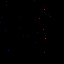
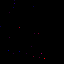
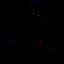
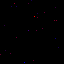
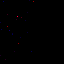

In [21]:
import os
import random
import base64
from IPython.display import display, HTML

boss_img_path = 'all_images/ipynb_demo_boss/train/train'

def display_random_images_row(image_dir, num_images=5, scale=6):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
    selected_files = random.sample(image_files, min(num_images, len(image_files)))
    images = [os.path.join(image_dir, f) for f in selected_files]
    html = "<div style='display: flex; gap: 10px;'>"
    for img_path in images:
        with open(img_path, "rb") as f:
            data = base64.b64encode(f.read()).decode()
        html += (
            f"<img src='data:image/png;base64,{data}' width='{64*scale}' height='{64*scale}' "
            "style='image-rendering: pixelated; image-rendering: crisp-edges; border:1px solid #ccc;'/>"
        )
    html += "</div>"
    display(HTML(html))

display_random_images_row(boss_img_path, num_images=5, scale=6)